In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from testing_initial_analysis import means_for_file2
%matplotlib inline

C:\Users\lenovo\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


In [5]:
raw_data_test=pd.read_csv('file_test_copy.csv',index_col='time')

In [6]:
probabilities_df = pd.DataFrame({'No Failure':0.5*100,'leaf1':1/24*100,'leaf2':1/24*100,'leaf3':1/24*100,'leaf4':1/24*100,'leaf5':1/24*100,'leaf6':1/24*100,'leaf7':1/24*100,'leaf8':1/24*100,'spine1':1/24*100,'spine2':1/24*100,'spine3':1/24*100,'spine4':1/24*100},index=[0])

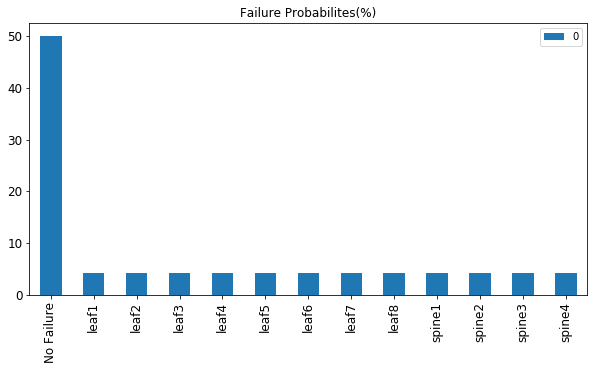

In [7]:
bargraph=probabilities_df.iloc[-1].plot(kind='bar', title="Failure Probabilites(%)", figsize=(10,5), legend=True, fontsize=12)

In [8]:
thresholds_for_no_failure=np.array([0,1.67,1.52,1.66,1.59,1.67,2.34,1.96,1.75,1.77,2.02,5.27,1.99])

In [9]:
thresholds_for_disturbance=np.array([0,20.528117,19.28161,14.87065,18.99584,1.665798,2.688994,5.152617,1.847266,13.96025,20.60913,19.35822,23.86123])

In [10]:
input_and_output_test=pd.DataFrame(columns=['leaf1','leaf2','leaf3','leaf4','leaf5','leaf6','leaf7','leaf8','spine1','spine2','spine3','spine4'],index=raw_data_test.index)

In [11]:
for i in input_and_output_test:
    input_and_output_test[i] = raw_data_test[i+' input packet rate'] + raw_data_test[i+' output packet rate']

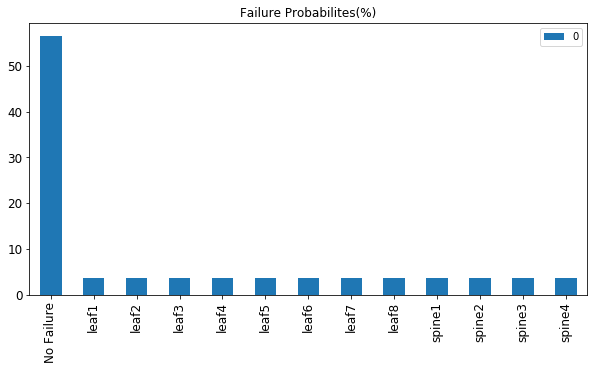

In [40]:
percentage_change_for_leaf1=[0]
i=0
while i < max(input_and_output_test['leaf1'].dropna().index):
    for j in input_and_output_test['leaf1'].dropna().index:
        if j-i > 5000000000:
            percentage_change_for_leaf1.append(((means_for_file2[1]-input_and_output_test.leaf1.dropna().loc[i:j].mean())/means_for_file2[1])*100)
            break
    i=j

for i in range(2,len(percentage_change_for_leaf1)):
    if float(percentage_change_for_leaf1[i]) < thresholds_for_no_failure[1]:
        probabilities_df['No Failure'] += 1.1
        probabilities_df['leaf1'] -= 0.1
        probabilities_df['leaf2'] -= 0.1
        probabilities_df['leaf3'] -= 0.1
        probabilities_df['leaf4'] -= 0.1
        probabilities_df['leaf5'] -= 0.1
        probabilities_df['leaf6'] -= 0.1
        probabilities_df['leaf7'] -= 0.1
        probabilities_df['leaf8'] -= 0.1
        probabilities_df['spine1'] -= 0.1
        probabilities_df['spine2'] -= 0.1
        probabilities_df['spine3'] -= 0.1
        probabilities_df['spine4'] -= 0.1
        
    if float(percentage_change_for_leaf1[i]) > thresholds_for_no_failure[1] and float(percentage_change_for_leaf1[i]) < thresholds_disturbance[1]:
        probabilities_df['No Failure'] -= 11
        probabilities_df['leaf1'] += 1
        probabilities_df['leaf2'] += 1
        probabilities_df['leaf3'] += 1
        probabilities_df['leaf4'] += 1
        probabilities_df['leaf5'] += 1
        probabilities_df['leaf6'] += 1
        probabilities_df['leaf7'] += 1
        probabilities_df['leaf8'] += 1
        probabilities_df['spine1'] += 1
        probabilities_df['spine2'] += 1
        probabilities_df['spine3'] += 1
        probabilities_df['spine4'] += 1
        
        
        
        
bargraph=probabilities_df.iloc[-1].plot(kind='bar', title="Failure Probabilites(%)", figsize=(10,5), legend=True, fontsize=12)